In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def probability_driving_faster_than_45():
    lower_limit = 40
    upper_limit = 60
    threshold = 45
    probability = (upper_limit - threshold) / (upper_limit - lower_limit)
    return probability

# Part (b)
def probability_driving_faster_than_55():
    lower_limit = 40
    upper_limit = 60
    threshold = 55
    probability = (upper_limit - threshold) / (upper_limit - lower_limit)
    return probability

def probability_paying_more_than_250():
    probability_getting_ticket = 0.3
    ticket_fee_lower_limit = 100
    ticket_fee_upper_limit = 300
    threshold = 250
    probability_fee_more_than_250 = (ticket_fee_upper_limit - threshold) / (ticket_fee_upper_limit - ticket_fee_lower_limit)
    
    # Call the function to get the probability
    prob_driving_faster_than_55 = probability_driving_faster_than_55()
    
    probability_paying_more_than_250 = prob_driving_faster_than_55 * probability_getting_ticket * probability_fee_more_than_250
    return probability_paying_more_than_250

# Call the functions
prob_driving_faster_than_45 = probability_driving_faster_than_45()
print(f"The probability of driving faster than 45 mph is: {prob_driving_faster_than_45}")

prob_paying_more_than_250 = probability_paying_more_than_250()
print(f"The probability of paying more than $250 for a ticket is: {prob_paying_more_than_250}")

The probability of driving faster than 45 mph is: 0.75
The probability of paying more than $250 for a ticket is: 0.01875


In [3]:

!pip install -U ppscore
!pip install dcor

  Preparing metadata (setup.py) ... - \ | done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.2 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=e1df656e0145ac369159195535d48e62fbc01fb7e41b58fece5ea301ce3748cd
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.1.6 which is incompatible.
dask-expr 1.0.11 requires pandas>=2, but you have pandas 


Data Matrix:
     A   B   C
0   91  95  93
1   69  74  76
2    8   3  20
3   15  13  49
4   58  56  55
5   28  30  38
6   90  93   8
7   92  91  98
8   92  92  27
9    6   9  20
10  56  57  84
11  31  32  35
12  40  41  16
13   5   2  45

Covariance Matrix:
[[1164.55494505 1206.59340659  427.01098901]
 [1206.59340659 1256.74725275  440.3956044 ]
 [ 427.01098901  440.3956044   889.34065934]]


Normalized Covariance Matrix:
[[1.         0.99737157 0.41958986]
 [0.99737157 1.         0.41656706]
 [0.41958986 0.41656706 1.        ]]

Pearson correlation coefficients:
(A, B) : 0.9973715678477153
(A, C) : 0.4195898613110208
(B, C) : 0.41656706396653165

Spearman rank correlation coefficients:
(A, B) : 0.9548960673768102
(A, C) : 0.34581497797356836
(B, C) : 0.29042921864916815

Kendall Tau correlation coefficients:
(A, B) : 0.8618916073713346
(A, C) : 0.25555555555555554
(B, C) : 0.22099784804393197

Distance correlation coefficients:
(A, B) : 0.9979120927086691
(A, C) : 0.5455019496166758


/opt/conda/lib/python3.10/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


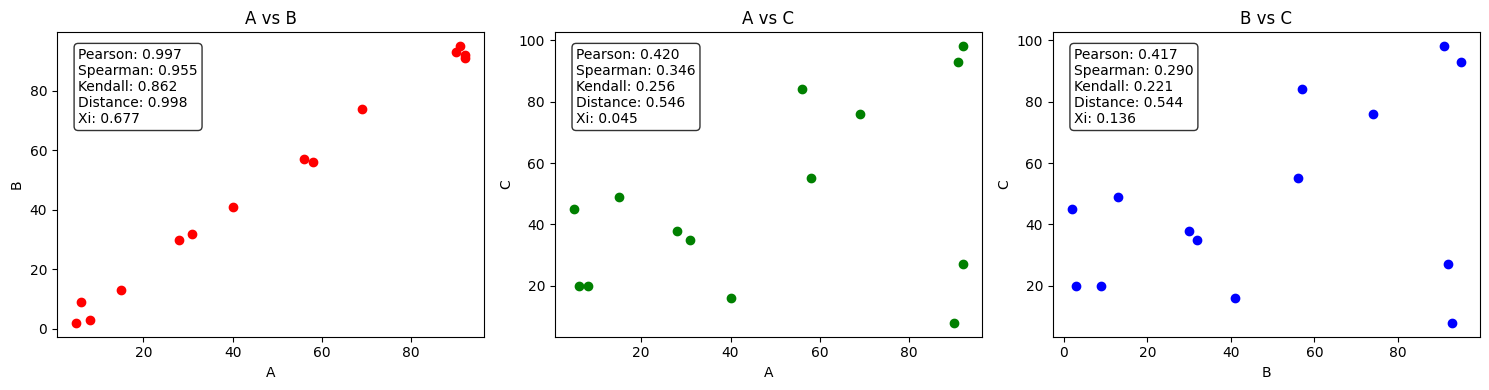

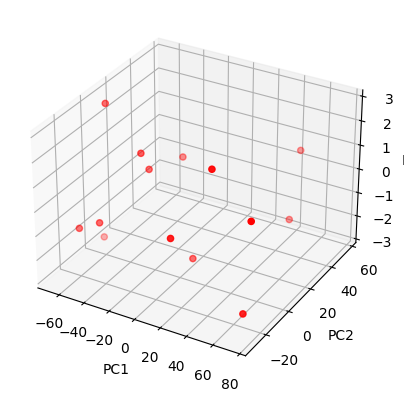

PPS Matrix:
 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.decomposition import PCA
import ppscore as pps
import dcor

# Data
A = [91, 69, 8, 15, 58, 28, 90, 92, 92, 6, 56, 31, 40, 5]
B = [95, 74, 3, 13, 56, 30, 93, 91, 92, 9, 57, 32, 41, 2]
C = [93, 76, 20, 49, 55, 38, 8, 98, 27, 20, 84, 35, 16, 45]

# Setup Pandas DataFrame for Predictive Power Score

df = pd.DataFrame()
df["A"] = np.array(A)
df["B"] = np.array(B) 
df["C"] = np.array(C)
print("\nData Matrix:")
print(df)
pps.matrix(df)


# Covariance matrix
data_matrix = np.column_stack((A, B, C))
cov_matrix = np.cov(data_matrix.T)
print("")
print("Covariance Matrix:")
print(cov_matrix)
print("")

# Normalize the covariance matrix
std_devs = np.sqrt(np.diag(cov_matrix))
norm_cov_matrix = cov_matrix / np.outer(std_devs, std_devs)

print("\nNormalized Covariance Matrix:")
print(norm_cov_matrix)
print("")


## Python Function ##
from numpy import array, random, arange

def xicor(X, Y, ties=True):
    random.seed(42)
    n = len(X)
    order = array([i[0] for i in sorted(enumerate(X), key=lambda x: x[1])])
    if ties:
        l = array([sum(y >= Y[order]) for y in Y[order]])
        r = l.copy()
        for j in range(n):
            if sum([r[j] == r[i] for i in range(n)]) > 1:
                tie_index = array([r[j] == r[i] for i in range(n)])
                r[tie_index] = random.choice(r[tie_index] - arange(0, sum([r[j] == r[i] for i in range(n)])), sum(tie_index), replace=False)
        return 1 - n*sum( abs(r[1:] - r[:n-1]) ) / (2*sum(l*(n - l)))
    else:
        r = array([sum(y >= Y[order]) for y in Y[order]])
        return 1 - 3 * sum( abs(r[1:] - r[:n-1]) ) / (n**2 - 1)


# Correlation coefficients
corr_pearson_AB, _ = pearsonr(A, B)
corr_spearman_AB, _ = spearmanr(A, B)
corr_kendalltau_AB, _ = kendalltau(A, B)
corr_xi_AB = xicor(np.array(A), np.array(B))
corr_distance_AB = dcor.distance_correlation(np.array(A), np.array(B))

corr_pearson_AC, _ = pearsonr(A, C)
corr_spearman_AC, _ = spearmanr(A, C)
corr_kendalltau_AC, _ = kendalltau(A, C)
corr_xi_AC = xicor(np.array(A), np.array(C))
corr_distance_AC = dcor.distance_correlation(np.array(A), np.array(C))

corr_pearson_BC, _ = pearsonr(B, C)
corr_spearman_BC, _ = spearmanr(B, C)
corr_kendalltau_BC, _ = kendalltau(B, C)
corr_xi_BC = xicor(np.array(B), np.array(C))
corr_distance_BC = dcor.distance_correlation(np.array(B), np.array(C))


print("Pearson correlation coefficients:")
print("(A, B) :", corr_pearson_AB)
print("(A, C) :", corr_pearson_AC)
print("(B, C) :", corr_pearson_BC)

print("\nSpearman rank correlation coefficients:")
print("(A, B) :", corr_spearman_AB)
print("(A, C) :", corr_spearman_AC)
print("(B, C) :", corr_spearman_BC)

print("\nKendall Tau correlation coefficients:")
print("(A, B) :", corr_kendalltau_AB)
print("(A, C) :", corr_kendalltau_AC)
print("(B, C) :", corr_kendalltau_BC)

print("\nDistance correlation coefficients:")
print("(A, B) :", corr_distance_AB)
print("(A, C) :", corr_distance_AC)
print("(B, C) :", corr_distance_BC)

print("\nXi correlation coefficients:")
print("(A, B) :", corr_xi_AB)
print("(A, C) :", corr_xi_AC)
print("(B, C) :", corr_xi_BC)

# PPS
pps.matrix(df)
pps.score(df, "A", "B")
print("PPS Matrix:")
pps.matrix(df)
print(" ")

# Plots with Correlations
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(A, B, c='r')
axs[0].set_title("A vs B")
axs[0].set_xlabel("A")
axs[0].set_ylabel("B")
# Add correlation labels (rounded for better display)
axs[0].text(0.05, 0.95, f"Pearson: {corr_pearson_AB:.3f}\nSpearman: {corr_spearman_AB:.3f}\nKendall: {corr_kendalltau_AB:.3f}\nDistance: {corr_distance_AB:.3f}\nXi: {corr_xi_AB:.3f}",
            transform=axs[0].transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

axs[1].scatter(A, C, c='g')
axs[1].set_title("A vs C")
axs[1].set_xlabel("A")
axs[1].set_ylabel("C")
axs[1].text(0.05, 0.95, f"Pearson: {corr_pearson_AC:.3f}\nSpearman: {corr_spearman_AC:.3f}\nKendall: {corr_kendalltau_AC:.3f}\nDistance: {corr_distance_AC:.3f}\nXi: {corr_xi_AC:.3f}",
            transform=axs[1].transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

axs[2].scatter(B, C, c='b')
axs[2].set_title("B vs C")
axs[2].set_xlabel("B")
axs[2].set_ylabel("C")
axs[2].text(0.05, 0.95, f"Pearson: {corr_pearson_BC:.3f}\nSpearman: {corr_spearman_BC:.3f}\nKendall: {corr_kendalltau_BC:.3f}\nDistance: {corr_distance_BC:.3f}\nXi: {corr_xi_BC:.3f}",
            transform=axs[2].transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# PCA
data = np.column_stack((A, B, C))
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data)

# 3D plot of PCA vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c='r', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# PPS
pps.score(df, "A", "B")
print("PPS Matrix:")
pps.matrix(df)
print(" ")

In [5]:
import pandas as pd
import numpy as np
import ppscore as pps

A = [91, 69, 8, 15, 58, 28, 90, 92, 92, 6, 56, 31, 40, 5]
B = [95, 74, 3, 13, 56, 30, 93, 91, 92, 9, 57, 32, 41, 2]
C = [93, 76, 20, 49, 55, 38, 8, 98, 27, 20, 84, 35, 16, 45]

df = pd.DataFrame()
df["A"] = np.array(A)
df["B"] = np.array(B) 
df["C"] = np.array(C) 

pps.matrix(df)



/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,A,A,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,A,B,0.723326,regression,True,mean absolute error,30.571429,8.458333,DecisionTreeRegressor()
2,A,C,0.000000,regression,True,mean absolute error,24.000000,35.041667,DecisionTreeRegressor()
3,B,A,0.761747,regression,True,mean absolute error,29.642857,7.062500,DecisionTreeRegressor()
4,B,B,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,B,C,0.000000,regression,True,mean absolute error,24.000000,33.583333,DecisionTreeRegressor()
6,C,A,0.167871,regression,True,mean absolute error,29.642857,24.666667,DecisionTreeRegressor()
7,C,B,0.135222,regression,True,mean absolute error,30.571429,26.437500,DecisionTreeRegressor()
8,C,C,1.000000,predict_itself,True,None,0.000000,1.000000,None


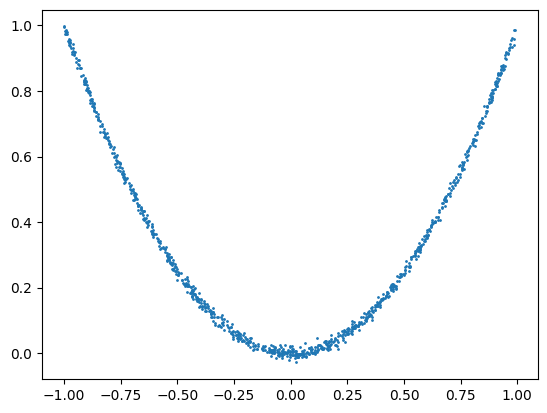

Pearson's correlation: -0.0489
Distance correlation: 0.4997
     A   B   C
0   91  95  93
1   69  74  76
2    8   3  20
3   15  13  49
4   58  56  55
5   28  30  38
6   90  93   8
7   92  91  98
8   92  92  27
9    6   9  20
10  56  57  84
11  31  32  35
12  40  41  16
13   5   2  45


/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,A,A,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,A,B,0.723326,regression,True,mean absolute error,30.571429,8.458333,DecisionTreeRegressor()
2,A,C,0.000000,regression,True,mean absolute error,24.000000,35.041667,DecisionTreeRegressor()
3,B,A,0.761747,regression,True,mean absolute error,29.642857,7.062500,DecisionTreeRegressor()
4,B,B,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,B,C,0.000000,regression,True,mean absolute error,24.000000,33.583333,DecisionTreeRegressor()
6,C,A,0.167871,regression,True,mean absolute error,29.642857,24.666667,DecisionTreeRegressor()
7,C,B,0.135222,regression,True,mean absolute error,30.571429,26.437500,DecisionTreeRegressor()
8,C,C,1.000000,predict_itself,True,None,0.000000,1.000000,None


In [6]:
# !pip install dcor 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import dcor

n_samples = 1000
random_state = np.random.default_rng(123456)
x = random_state.uniform(-1, 1, size=n_samples)
y = x**2 + random_state.normal(0, 0.01, size=n_samples)

# Scatter plot
plt.scatter(x, y, s=1)
plt.show()

# Pearson’s correlation
pearson_corr = scipy.stats.pearsonr(x, y).statistic
print(f"Pearson's correlation: {pearson_corr:.4f}")

# Distance correlation
dist_corr = dcor.distance_correlation(x, y)
print(f"Distance correlation: {dist_corr:.4f}")

import pandas as pd
import numpy as np
import ppscore as pps

A = [91, 69, 8, 15, 58, 28, 90, 92, 92, 6, 56, 31, 40, 5]
B = [95, 74, 3, 13, 56, 30, 93, 91, 92, 9, 57, 32, 41, 2]
C = [93, 76, 20, 49, 55, 38, 8, 98, 27, 20, 84, 35, 16, 45]

df = pd.DataFrame()
df["A"] = np.array(A)
df["B"] = np.array(B) 
df["C"] = np.array(C) 
print(df)
pps.matrix(df)

In [7]:
import pandas as pd
import numpy as np
import ppscore as pps

A = [91, 69, 8, 15, 58, 28, 90, 92, 92, 6, 56, 31, 40, 5]
B = [95, 74, 3, 13, 56, 30, 93, 91, 92, 9, 57, 32, 41, 2]
C = [93, 76, 20, 49, 55, 38, 8, 98, 27, 20, 84, 35, 16, 45]

df = pd.DataFrame()
df["A"] = np.array(A)
df["B"] = np.array(B) 
df["C"] = np.array(C) 

pps.matrix(df)
#pps.score(df, "A", "C")
#pps.score(df, "B", "C")

/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,A,A,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,A,B,0.723326,regression,True,mean absolute error,30.571429,8.458333,DecisionTreeRegressor()
2,A,C,0.000000,regression,True,mean absolute error,24.000000,35.041667,DecisionTreeRegressor()
3,B,A,0.761747,regression,True,mean absolute error,29.642857,7.062500,DecisionTreeRegressor()
4,B,B,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,B,C,0.000000,regression,True,mean absolute error,24.000000,33.583333,DecisionTreeRegressor()
6,C,A,0.167871,regression,True,mean absolute error,29.642857,24.666667,DecisionTreeRegressor()
7,C,B,0.135222,regression,True,mean absolute error,30.571429,26.437500,DecisionTreeRegressor()
8,C,C,1.000000,predict_itself,True,None,0.000000,1.000000,None


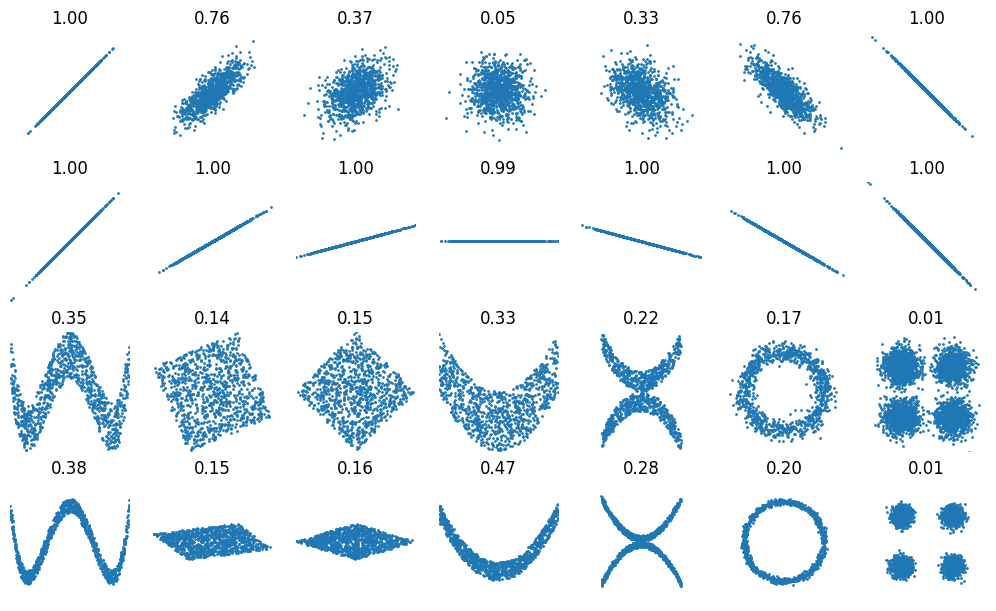

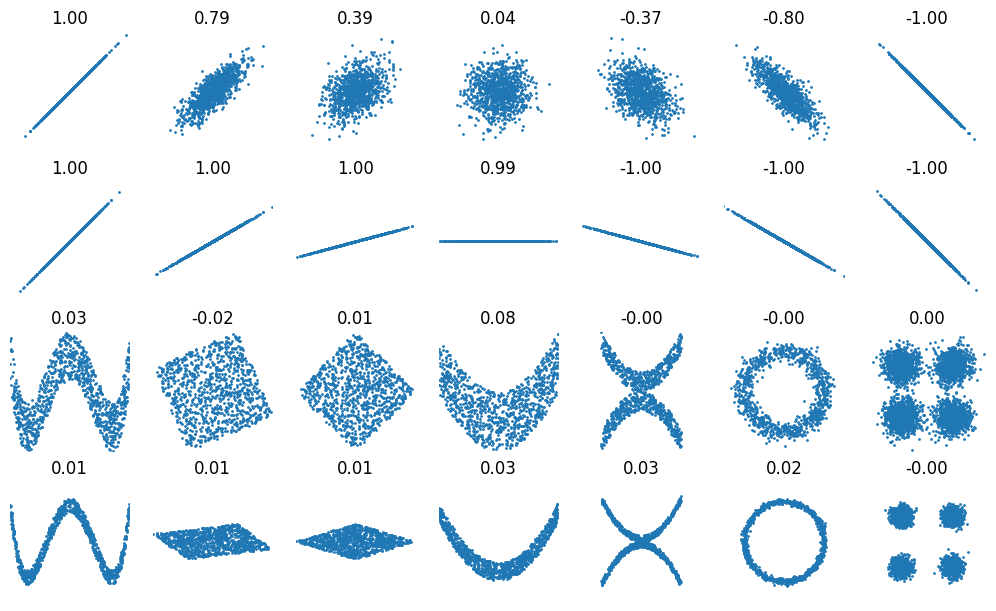

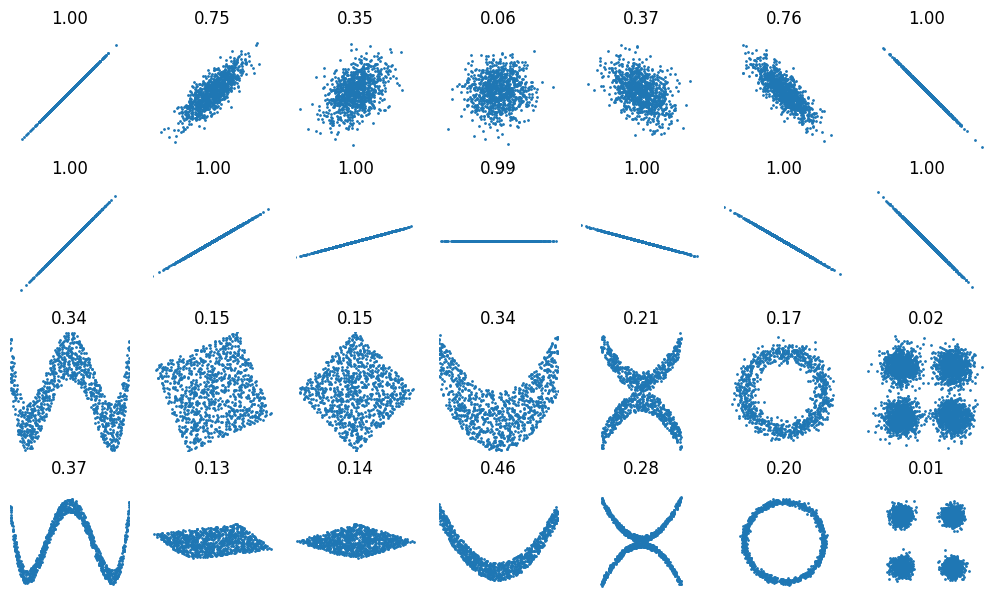

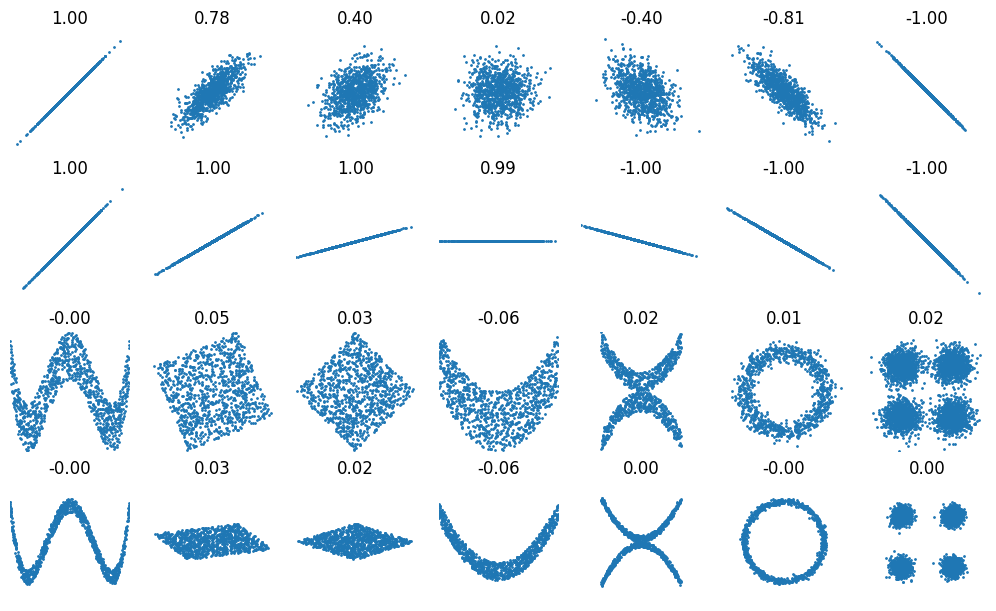

In [8]:
""""
Distance correlation plot
=========================
Plot 2d synthetic datasets and compute distance correlation between their
coordinates.
"""
# %%
# The objective of this example is to replicate the results obtained in the
# `Wikipedia page for distance correlation
# <https://en.wikipedia.org/wiki/Distance_correlation#/media/File:Distance_Correlation_Examples.svg>`_.
#
# We first include the necessary imports.
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import dcor
# %%
# We now create a random generator with a fixed seed for reproducibility.
# We also define the number of samples per dataset.
# Both will be global variables for this script.
random_state = np.random.default_rng(seed=123456789)
n_samples = 1000
# %%
# We now define utility functions for plotting the data and generating the
# synthetic datasets.
"""
Distance correlation plot
=========================
Plot 2d synthetic datasets and compute distance correlation between their
coordinates.
"""
# %%
# The objective of this example is to replicate the results obtained in the
# `Wikipedia page for distance correlation
# <https://en.wikipedia.org/wiki/Distance_correlation#/media/File:Distance_Correlation_Examples.svg>`_.
#
# We first include the necessary imports.
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import dcor
# %%
# We now create a random generator with a fixed seed for reproducibility.
# We also define the number of samples per dataset.
# Both will be global variables for this script.
random_state = np.random.default_rng(seed=123456789)
n_samples = 1000
# %%
# We now define utility functions for plotting the data and generating the
# synthetic datasets.

def plot_data(x, y, ax, xlim, ylim):
    """Plot the data without axis."""
    ax.set_title(f"{correlation:.1f}")
    ax.set_title(f"{correlation:.2f}")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.scatter(x, y, s=1)
    ax.axis(False)
# %%
# The first row of datasets is composed of bivariate Gaussian distributions
# with different correlations between the coordinates, so we define a
# function that returns one of these datasets given the desired correlation.
def gaussian2d(correlation):
    """Generate 2D Gaussian data with a particular correlation."""
    return random_state.multivariate_normal(
        mean=[0, 0],
        cov=[[1, correlation], [correlation, 1]],
        size=n_samples,
    )
# %%
# The second row of datasets have the data in a line with different rotations.
# We now define a function for rotating a dataset by a given number of degrees.
# That rotation is performed using a
# `rotation matrix <https://en.wikipedia.org/wiki/Rotation_matrix>`_.
def rotate(data, angle):
    """Apply a rotation in degrees."""
    angle = np.deg2rad(angle)
    rotation_matrix = [
        [np.cos(angle), - np.sin(angle)],
        [np.sin(angle), np.cos(angle)],
    ]
    return data @ rotation_matrix
# %%
# The two final rows of datasets consist of data with complex relationships
# between the coordinates.
# The difference between these rows is the spread of the data, so we make
# that a parameter.
# We have made this function a generator that yields each dataset one at a
# time, in order to simplify looping over the datasets.
# As each distribution has different support, we make sure to yield not only
# the data, but also the limits for plotting.
def other_datasets(spread):
    """Generate other complex datasets."""
    x = random_state.uniform(-1, 1, size=n_samples)
    y = (
        4 * (x**2 - 1 / 2)**2
        + random_state.uniform(-1, 1, size=n_samples) / 3 * spread
    )
    yield x, y, (-1, 1), (-1 / 3, 1 + 1 / 3)
    y = random_state.uniform(-1, 1, size=n_samples)
    xy = rotate(np.column_stack([x, y]), -22.5)
    lim = np.sqrt(2 + np.sqrt(2)) / np.sqrt(2)
    yield xy[:, 0], xy[:, 1] * spread, (-lim, lim), (-lim, lim)
    xy = rotate(xy, -22.5)
    lim = np.sqrt(2)
    yield xy[:, 0], xy[:, 1] * spread, (-lim, lim), (-lim, lim)
    y = 2 * x**2 + random_state.uniform(-1, 1, size=n_samples) * spread
    yield x, y, (-1, 1), (-1, 3)
    y = (
        (x**2 + random_state.uniform(0, 1 / 2, size=n_samples) * spread)
        * random_state.choice([-1, 1], size=n_samples)
    )
    yield x, y, (-1.5, 1.5), (-1.5, 1.5)
    y = (
        np.cos(x * np.pi)
        + random_state.normal(0, 1 / 8, size=n_samples) * spread
    )
    x = (
        np.sin(x * np.pi)
        + random_state.normal(0, 1 / 8, size=n_samples) * spread
    )
    yield x, y, (-1.5, 1.5), (-1.5, 1.5)
    xy = np.concatenate([
        random_state.multivariate_normal(
            mean,
            np.eye(2) * spread,
            size=n_samples,
        )
        for mean in ([3, 3], [-3, 3], [-3, -3], [3, -3])
    ])
    lim = 3 + 4
    yield xy[:, 0], xy[:, 1], (-lim, lim), (-lim, lim)
# %%
# Finally, we define the function that yields all the datasets in order.
def all_datasets():
    """Generate all the datasets in the example."""
    for correlation in (1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0):
        x, y = gaussian2d(correlation).T
        yield x, y, (-4, 4), (-4, 4)
    line = gaussian2d(correlation=1)
    for angle in (0, 15, 30, 45, 60, 75, 90):
        x, y = rotate(line, angle).T
        yield x, y, (-4, 4), (-4, 4)
    yield from other_datasets(spread=1)
    yield from other_datasets(spread=0.3)
# %%
# We can now compute and plot each dataset, and the distance correlation
# between their coordinates.
subplot_kwargs = dict(
    figsize=(10, 6),
    constrained_layout=True,
    subplot_kw=dict(box_aspect=1),
)
fig, axes = plt.subplots(4, 7, **subplot_kwargs)
for (x, y, xlim, ylim), ax in zip(all_datasets(), axes.flat):
    correlation = dcor.distance_correlation(x, y)
    plot_data(x, y, ax=ax, xlim=xlim, ylim=ylim)
# %%
# For comparison, we include the results obtained with the standard Pearson
# correlation, also available in
# `Wikipedia
# <https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg>`_.
fig, axes = plt.subplots(4, 7, **subplot_kwargs)
for (x, y, xlim, ylim), ax in zip(all_datasets(), axes.flat):
    correlation = scipy.stats.pearsonr(x, y).statistic
    plot_data(x, y, ax=ax, xlim=xlim, ylim=ylim)
    ax.axis(False)
# %%
# The first row of datasets is composed of bivariate Gaussian distributions
# with different correlations between the coordinates, so we define a
# function that returns one of these datasets given the desired correlation.
def gaussian2d(correlation):
    """Generate 2D Gaussian data with a particular correlation."""
    return random_state.multivariate_normal(
        mean=[0, 0],
        cov=[[1, correlation], [correlation, 1]],
        size=n_samples,
    )
# %%
# The second row of datasets have the data in a line with different rotations.
# We now define a function for rotating a dataset by a given number of degrees.
# That rotation is performed using a
# `rotation matrix <https://en.wikipedia.org/wiki/Rotation_matrix>`_.
def rotate(data, angle):
    """Apply a rotation in degrees."""
    angle = np.deg2rad(angle)
    rotation_matrix = [
        [np.cos(angle), - np.sin(angle)],
        [np.sin(angle), np.cos(angle)],
    ]
    return data @ rotation_matrix
# %%
# The two final rows of datasets consist of data with complex relationships
# between the coordinates.
# The difference between these rows is the spread of the data, so we make
# that a parameter.
# We have made this function a generator that yields each dataset one at a
# time, in order to simplify looping over the datasets.
# As each distribution has different support, we make sure to yield not only
# the data, but also the limits for plotting.
def other_datasets(spread):
    """Generate other complex datasets."""
    x = random_state.uniform(-1, 1, size=n_samples)
    y = (
        4 * (x**2 - 1 / 2)**2
        + random_state.uniform(-1, 1, size=n_samples) / 3 * spread
    )
    yield x, y, (-1, 1), (-1 / 3, 1 + 1 / 3)
    y = random_state.uniform(-1, 1, size=n_samples)
    xy = rotate(np.column_stack([x, y]), -22.5)
    lim = np.sqrt(2 + np.sqrt(2)) / np.sqrt(2)
    yield xy[:, 0], xy[:, 1] * spread, (-lim, lim), (-lim, lim)
    xy = rotate(xy, -22.5)
    lim = np.sqrt(2)
    yield xy[:, 0], xy[:, 1] * spread, (-lim, lim), (-lim, lim)
    y = 2 * x**2 + random_state.uniform(-1, 1, size=n_samples) * spread
    yield x, y, (-1, 1), (-1, 3)
    y = (
        (x**2 + random_state.uniform(0, 1 / 2, size=n_samples) * spread)
        * random_state.choice([-1, 1], size=n_samples)
    )
    yield x, y, (-1.5, 1.5), (-1.5, 1.5)
    y = (
        np.cos(x * np.pi)
        + random_state.normal(0, 1 / 8, size=n_samples) * spread
    )
    x = (
        np.sin(x * np.pi)
        + random_state.normal(0, 1 / 8, size=n_samples) * spread
    )
    yield x, y, (-1.5, 1.5), (-1.5, 1.5)
    xy = np.concatenate([
        random_state.multivariate_normal(
            mean,
            np.eye(2) * spread,
            size=n_samples,
        )
        for mean in ([3, 3], [-3, 3], [-3, -3], [3, -3])
    ])
    lim = 3 + 4
    yield xy[:, 0], xy[:, 1], (-lim, lim), (-lim, lim)
# %%
# Finally, we define the function that yields all the datasets in order.
def all_datasets():
    """Generate all the datasets in the example."""
    for correlation in (1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0):
        x, y = gaussian2d(correlation).T
        yield x, y, (-4, 4), (-4, 4)
    line = gaussian2d(correlation=1)
    for angle in (0, 15, 30, 45, 60, 75, 90):
        x, y = rotate(line, angle).T
        yield x, y, (-4, 4), (-4, 4)
    yield from other_datasets(spread=1)
    yield from other_datasets(spread=0.3)
# %%
# We can now compute and plot each dataset, and the distance correlation
# between their coordinates.
subplot_kwargs = dict(
    figsize=(10, 6),
    constrained_layout=True,
    subplot_kw=dict(box_aspect=1),
)
fig, axes = plt.subplots(4, 7, **subplot_kwargs)
for (x, y, xlim, ylim), ax in zip(all_datasets(), axes.flat):
    correlation = dcor.distance_correlation(x, y)
    plot_data(x, y, ax=ax, xlim=xlim, ylim=ylim)
# %%
# For comparison, we include the results obtained with the standard Pearson
# correlation, also available in
# `Wikipedia
# <https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg>`_.
fig, axes = plt.subplots(4, 7, **subplot_kwargs)
for (x, y, xlim, ylim), ax in zip(all_datasets(), axes.flat):
    correlation = scipy.stats.pearsonr(x, y).statistic
    plot_data(x, y, ax=ax, xlim=xlim, ylim=ylim)